# Mengimport Library

Pada model machine learning berikut akan dilakukan regresi untuk memprediksi harga tertinggi dan harga terendah dari perusahaan Intel melalui algoritma linear regression dan support vector regression

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Mengimport dataset ke dataframe

In [95]:
df = pd.read_csv('/content/INTC.csv')

# Menampilkan 5 data pertama

In [96]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.325521,0.330729,0.325521,0.325521,0.199557,10924800
1,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.197961,17068800
2,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.202750,18508800
3,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.201952,11174400
4,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.194767,12172800


# Menghilangkan special character dan mengubah tipe data menjadi integer pada data kolom Date agar dapat dilatih ke model

In [97]:
for i in range(len(df['Date'])):
  df['Date'][i] = int(df['Date'][i].replace('-', ''))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Membuat variabel berisi data fitur dan data target
Fitur yang akan diambil adalah data tanggal, sementara target atau label yang diambil adalah harga saham tertinggi dan harga saham terendah.

In [98]:
x = df[['Date']]
y1 = df[['High']]
y2 = df[['Low']]

# Pemisahan data fitur dan target ke data training dan data test

In [99]:
xtrain, xtest, hitrain, hitest = train_test_split(x, y1, test_size=0.2,shuffle=False, random_state=0)
lotrain, lotest = train_test_split(y2, test_size=0.2,shuffle=False, random_state=0)

# Linear Regression

In [100]:
modelLinearHi = LinearRegression()
modelLinearHi.fit(xtrain, hitrain)
modelLinearLo = LinearRegression()
modelLinearLo.fit(xtrain, hitrain)

LinearRegression()

# Plot grafik dari linear regression dan mean squared error dari model harga saham tertinggi

Mean squared error pada data test: 120.70
Mean squared error pada data train: 94.43


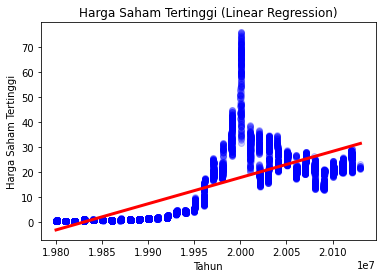

In [101]:
hipred = modelLinearHi.predict(xtest)
print("Mean squared error pada data test: %.2f" % mean_squared_error(hitest, hipred))

hipred = modelLinearHi.predict(xtrain)
print("Mean squared error pada data train: %.2f" % mean_squared_error(hitrain, hipred))

plt.plot(xtrain, hipred, color="red", linewidth=3)
plt.scatter(xtrain, hitrain, color='blue', label='nilai aktual', alpha=0.2)
plt.title('Harga Saham Tertinggi (Linear Regression)')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham Tertinggi')
plt.show()

# Plot grafik dari linear regression dan mean squared error dari model harga saham terendah

Mean squared error pada data test: 105.52
Mean squared error pada data train: 86.36


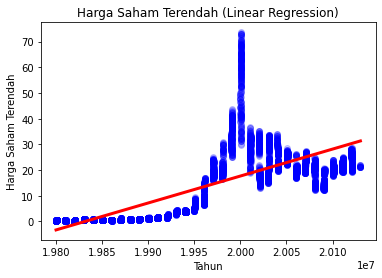

In [102]:
lopred = modelLinearLo.predict(xtest)
print("Mean squared error pada data test: %.2f" % mean_squared_error(lotest, lopred))

lopred = modelLinearLo.predict(xtrain)
print("Mean squared error pada data train: %.2f" % mean_squared_error(lotrain, lopred))

plt.plot(xtrain, lopred, color="red", linewidth=3)
plt.scatter(xtrain, lotrain, color='blue', label='nilai aktual', alpha=0.2)
plt.title('Harga Saham Terendah (Linear Regression)')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham Terendah')
plt.show()

# Support Vector Regression

In [103]:
modelSVRHi = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
modelSVRHi.fit(xtrain, hitrain)
modelSVRLo = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
modelSVRLo.fit(xtrain, lotrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

# Plot grafik dari support vector regression dan mean squared error dari model harga saham tertinggi

Mean squared error pada data test: 258.45
Mean squared error pada data train: 41.22


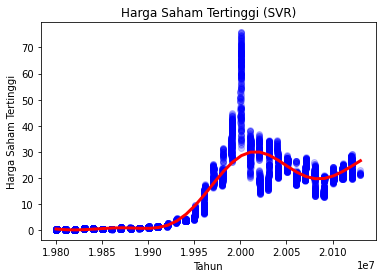

In [104]:
hipred = modelSVRHi.predict(xtest)
print("Mean squared error pada data test: %.2f" % mean_squared_error(hitest, hipred))

hipred = modelSVRHi.predict(xtrain)
print("Mean squared error pada data train: %.2f" % mean_squared_error(hitrain, hipred))

plt.plot(xtrain, hipred, color = 'red', linewidth=3)
plt.scatter(xtrain, hitrain, color='blue', label='nilai aktual', alpha=0.2)

plt.title('Harga Saham Tertinggi (SVR)')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham Tertinggi')
plt.show()


# Plot grafik dari support vector regression dan mean squared error dari model harga saham terendah

Mean squared error pada data test: 245.95
Mean squared error pada data train: 37.86


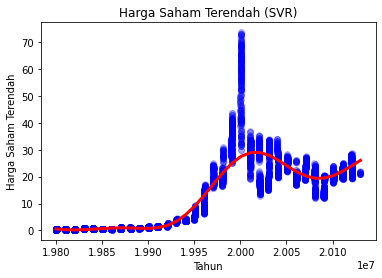

In [105]:
lopred = modelSVRLo.predict(xtest)
print("Mean squared error pada data test: %.2f" % mean_squared_error(lotest, lopred))

lopred = modelSVRLo.predict(xtrain)
print("Mean squared error pada data train: %.2f" % mean_squared_error(lotrain, lopred))

plt.plot(xtrain, lopred, color = 'red', linewidth=3)
plt.scatter(xtrain, lotrain, color='blue', label='nilai aktual', alpha=0.2)

plt.title('Harga Saham Terendah (SVR)')
plt.xlabel('Tahun')
plt.ylabel('Harga Saham Terendah')
plt.show()
